In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
from sklearn.model_selection import train_test_split
from shap.benchmark import SequentialPerturbation
from shap.benchmark import get_benchmark, trend_plot, compare_plot

In [2]:
metrics = {'sort_order': ['positive', 'negative'], 'perturbation': ['keep', 'remove']}

In [3]:
model_generator = lambda: xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = model_generator().fit(X_train, y_train)

In [ ]:
explainer_masker = X

In [4]:
permutation_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='permutation')
tree_explainer = shap.Explainer(model, explainer_masker, algorithm='tree')
exact_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='exact')

In [5]:
benchmark_masker = shap.maskers.Mean(X)

In [6]:
benchmarks = dict()
benchmarks[permutation_explainer.name] = get_benchmark(model.predict, X_train, y_train, permutation_explainer, benchmark_masker, metrics)
benchmarks[tree_explainer.name] = get_benchmark(model.predict, X_train, y_train, tree_explainer, benchmark_masker, metrics)
benchmarks[exact_explainer.name] = get_benchmark(model.predict, X_train, y_train, exact_explainer, benchmark_masker, metrics)

Permutation explainer: 355it [00:44,  7.97it/s]                                                                                                     


Permutation explainer: 355it [00:21, 16.89it/s]                                                                                                     


Permutation explainer: 355it [01:01,  5.74it/s]                                                                                                     


Permutation explainer: 355it [00:18, 19.08it/s]                                                                                                     


Exact explainer: 355it [17:45,  3.00s/it]                                                                                                           


Exact explainer: 355it [13:52,  2.35s/it]                                                                                                           


Exact explainer: 355it [12:55,  2.18s/it]                                                                                                           


Exact explainer: 355it [08:22,  1.42s/it]                                                                                                           


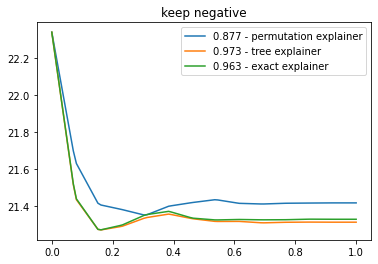

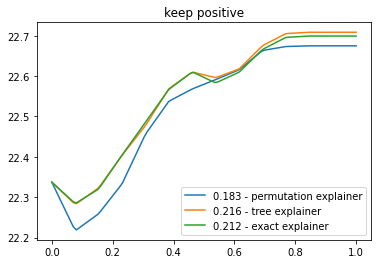

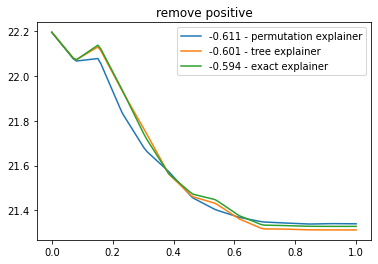

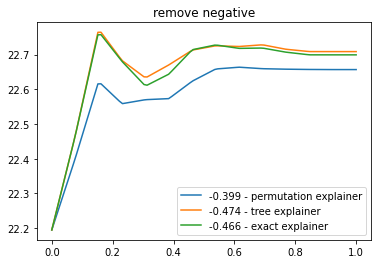

In [7]:
trend_plot(benchmarks)

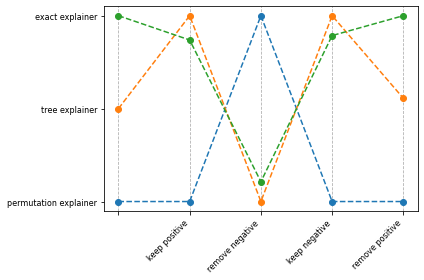

In [8]:
compare_plot(benchmarks)